<a href="https://colab.research.google.com/github/Jlok17/Data620/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project


**Goals:**
1.   Determine if there is a link between the Coach and the Offense/Defense Performance
2.   Figure out which coaches are the most influential and most connected within the NFL
3. Determine if there is a correlation between getting a head coach position and what the team hiring them for was lacking  

#### **Overview:**
For the most part of this study, I will looking at the social network between the head coaches of each team as well as the positional coaches to determine which coaches are the most connected. With this I hope to be able to gather information how each coach did during their tenure with a certain team to see if they impacted the Offense or Defense positively or negatively.

In [119]:
# Packages Needed
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import networkx as nx
import matplotlib.pyplot as plt


#### Web Scrapping:

The process that is done below is taking the URL shown below and then for each team through the period of 2010-2022. Scrapping the text and placing it as a string into a list named the team's abbreviation. The text is compiled and finally is verified with the print() line of the list to determine if it got the right number of text for each team.  









*You can skip to the Data Transformation as after the first examples of code it is just a repeated code for every NFL team in that website.








---



> A quick note with the process of webscrapping I used this [website](https://www.pro-football-reference.com/). The reason why my code is broken into separate blocks is that when I started gathering the information, the website has a 20 request/minute cap on any access. When you go beyond on that, you are blocked out of the website for a few hours so I wanted to maintain caution while trying to load the data. A thing I am going to note in the future section is that when I revist this project, there will a for loop created with the code below to not go beyond the 20 request/min.  

```
time.sleep(75)
```

  



In [2]:
url = "https://www.pro-football-reference.com/teams/rav/2012.htm"

# Getting Content from Url
response = requests.get(url)
webpage = response.content

# Convert the HTML content to text
webpage_text = BeautifulSoup(webpage, 'html.parser').select_one("#meta > div:nth-child(2)").get_text()

print(webpage_text)



2012
Baltimore Ravens
Rosters, Stats, Schedule, Team Draftees, Injury Reports


Previous Season
Next Season


Record: 10-6-0, 1st in
	AFC North Division
   (Schedule and Results)

Coach:
John Harbaugh (10-6-0)
Points For: 398 (24.9/g) 10th of 32
Points Against: 344 (21.5/g) 12th of 32
Expected W-L: 9.4-6.6
SRS: 2.91 (12th of 32), 
  SOS: -0.47

Playoffs:Won Wild Card 24-9 vs. Indianapolis ColtsWon Divisional Round 38-35 vs. Denver BroncosWon Conference Championship 28-13 vs. New England PatriotsWon Super Bowl 34-31 vs. San Francisco 49ers
Offensive Coordinator: Jim Caldwell, Cam Cameron
Defensive Coordinator: Dean Pees
Other Notable Asst.: Teryl Austin (Secondary), Juan Castillo (Running Game Coordinator), Jim Hostler (Wide Receivers), Don Martindale (Inside Linebackers), Ted Monachino (Linebackers Coach) and Jerry Rosburg (Special Teams Coordinator)


Stadium: M&T Bank Stadium
Principal Owner: Steve Bisciotti
General Manager: Ozzie Newsome
Offensive Scheme: Air Coryell
Defensive Ali

In [ ]:
time.sleep(75)

In [3]:
# Base URL of the website
base_url = "https://www.pro-football-reference.com/teams/rav/"

# List of targeted years
years = [year for year in range(2010, 2023)]

# Creating an empty list to store the webpage texts
rav = []

for year in years:
    # Construct the URL for the current year
    url = f"{base_url}{year}.htm"

    # Getting HTML content of the webpage
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')

    # Use CSS selector to select desired data
    specific_section = webpage.select_one("#meta > div:nth-child(2)")

    # Extracting text content
    specific_section_text = specific_section.get_text() if specific_section else None

    # Appending text to the list
    rav.append(specific_section_text)

# Checking to see if 13 pages were collected
print("Number of webpage texts collected:", len(rav))

Number of webpage texts collected: 13


In [4]:
print(rav)

['\n\n2010\nBaltimore Ravens\nRosters, Stats, Schedule, Team Draftees, Injury Reports\n\n\nPrevious Season\nNext Season\n\n\nRecord: 12-4-0, 2nd in\n\tAFC North Division\n  \xa0(Schedule and Results)\n\nCoach:\nJohn Harbaugh (12-4-0)\nPoints For: 357 (22.3/g) 16th of 32\nPoints Against: 270 (16.9/g) 3rd of 32\nExpected W-L: 10.6-5.4\nSRS: 6.44 (5th of 32),\xa0\n  SOS: 1.01\n\nPlayoffs:Won Wild Card 30-7 vs. Kansas City ChiefsLost Divisional Round 24-31 vs. Pittsburgh Steelers\nOffensive Coordinator: Cam Cameron\nDefensive Coordinator: Greg Mattison\nOther Notable Asst.: Jim Hostler (Wide Receivers), Ted Monachino (OLB Coach), Chuck Pagano (Secondary), Dean Pees (Linebackers), Jerry Rosburg (Special Teams Coordinator), Al Saunders (Offensive Consultant) and Jim Zorn (Quarterbacks)\n\n\nStadium: M&T Bank Stadium\nPrincipal Owner: Steve Bisciotti\nGeneral Manager: Ozzie Newsome\nOffensive Scheme: Air Coryell\nDefensive Alignment: 3-4\nPreseason Odds: Super Bowl +1200; O/U: 10.0\nTraining 

In [ ]:
time.sleep(75)

In [9]:
base_url = "https://www.pro-football-reference.com/teams/crd/"
years = [year for year in range(2010, 2023)]
crd = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    crd.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(crd))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [10]:
base_url = "https://www.pro-football-reference.com/teams/atl/"
years = [year for year in range(2010, 2023)]
atl = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    atl.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(atl))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [11]:
base_url = "https://www.pro-football-reference.com/teams/buf/"
years = [year for year in range(2010, 2023)]
buf = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    buf.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(buf))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [12]:
base_url = "https://www.pro-football-reference.com/teams/car/"
years = [year for year in range(2010, 2023)]
car = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    car.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(car))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [13]:
base_url = "https://www.pro-football-reference.com/teams/chi/"
years = [year for year in range(2010, 2023)]
chi = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    chi.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(chi))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [14]:
base_url = "https://www.pro-football-reference.com/teams/cin/"
years = [year for year in range(2010, 2023)]
cin = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    cin.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(cin))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [15]:
base_url = "https://www.pro-football-reference.com/teams/cle/"
years = [year for year in range(2010, 2023)]
cle = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    cle.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(cle))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [16]:
base_url = "https://www.pro-football-reference.com/teams/dal/"
years = [year for year in range(2010, 2023)]
dal = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    dal.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(dal))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [17]:
base_url = "https://www.pro-football-reference.com/teams/den/"
years = [year for year in range(2010, 2023)]
den = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    den.append(specific_section_text)

# Test
print("Number of webpage texts collected:", len(den))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [18]:
base_url = "https://www.pro-football-reference.com/teams/det/"
years = [year for year in range(2010, 2023)]
det = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    det.append(specific_section_text)

print("Number of webpage texts collected:", len(det))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [19]:
base_url = "https://www.pro-football-reference.com/teams/gnb/"
years = [year for year in range(2010, 2023)]
gnb = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    gnb.append(specific_section_text)


print("Number of webpage texts collected:", len(gnb))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [20]:
base_url = "https://www.pro-football-reference.com/teams/htx/"
years = [year for year in range(2010, 2023)]
htx = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    htx.append(specific_section_text)


print("Number of webpage texts collected:", len(htx))


Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [21]:
base_url = "https://www.pro-football-reference.com/teams/clt/"
years = [year for year in range(2010, 2023)]
clt = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    clt.append(specific_section_text)


print("Number of webpage texts collected:", len(clt))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [22]:
base_url = "https://www.pro-football-reference.com/teams/jax/"
years = [year for year in range(2010, 2023)]
jax = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    jax.append(specific_section_text)

print("Number of webpage texts collected:", len(jax))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [23]:
base_url = "https://www.pro-football-reference.com/teams/kan/"
years = [year for year in range(2010, 2023)]
kan = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    kan.append(specific_section_text)


print("Number of webpage texts collected:", len(kan))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [24]:
base_url = "https://www.pro-football-reference.com/teams/rai/"
years = [year for year in range(2010, 2023)]
rai = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    rai.append(specific_section_text)


print("Number of webpage texts collected:", len(rai))

Number of webpage texts collected: 13


In [ ]:
time.sleep(75)

In [25]:
base_url = "https://www.pro-football-reference.com/teams/sdg/"
years = [year for year in range(2010, 2023)]
sdg = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    sdg.append(specific_section_text)


print("Number of webpage texts collected:", len(sdg))

Number of webpage texts collected: 13


In [28]:
time.sleep(75)

In [29]:
base_url = "https://www.pro-football-reference.com/teams/ram/"
years = [year for year in range(2010, 2023)]
ram = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    ram.append(specific_section_text)


print("Number of webpage texts collected:", len(ram))

Number of webpage texts collected: 13


In [30]:
time.sleep(75)

In [31]:
base_url = "https://www.pro-football-reference.com/teams/mia/"
years = [year for year in range(2010, 2023)]
mia = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    mia.append(specific_section_text)


print("Number of webpage texts collected:", len(mia))

Number of webpage texts collected: 13


In [32]:
time.sleep(75)

In [33]:
base_url = "https://www.pro-football-reference.com/teams/min/"
years = [year for year in range(2010, 2023)]
min = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    min.append(specific_section_text)


print("Number of webpage texts collected:", len(min))

Number of webpage texts collected: 13


In [34]:
time.sleep(75)

In [35]:
base_url = "https://www.pro-football-reference.com/teams/nwe/"
years = [year for year in range(2010, 2023)]
nwe = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    nwe.append(specific_section_text)


print("Number of webpage texts collected:", len(nwe))

Number of webpage texts collected: 13


In [36]:
time.sleep(75)

In [37]:
base_url = "https://www.pro-football-reference.com/teams/nor/"
years = [year for year in range(2010, 2023)]
nor = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    nor.append(specific_section_text)


print("Number of webpage texts collected:", len(nor))

Number of webpage texts collected: 13


In [38]:
time.sleep(75)

In [39]:
base_url = "https://www.pro-football-reference.com/teams/nyg/"
years = [year for year in range(2010, 2023)]
nyg = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    nyg.append(specific_section_text)


print("Number of webpage texts collected:", len(nyg))

Number of webpage texts collected: 13


In [40]:
time.sleep(75)

In [41]:
base_url = "https://www.pro-football-reference.com/teams/nyj/"
years = [year for year in range(2010, 2023)]
nyj = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    nyj.append(specific_section_text)


print("Number of webpage texts collected:", len(nyj))

Number of webpage texts collected: 13


In [42]:
time.sleep(75)

In [43]:
base_url = "https://www.pro-football-reference.com/teams/phi/"
years = [year for year in range(2010, 2023)]
phi = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    phi.append(specific_section_text)


print("Number of webpage texts collected:", len(phi))

Number of webpage texts collected: 13


In [44]:
time.sleep(75)

In [45]:
base_url = "https://www.pro-football-reference.com/teams/pit/"
years = [year for year in range(2010, 2023)]
pit = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    pit.append(specific_section_text)


print("Number of webpage texts collected:", len(pit))

Number of webpage texts collected: 13


In [46]:
time.sleep(75)

In [47]:
base_url = "https://www.pro-football-reference.com/teams/sfo/"
years = [year for year in range(2010, 2023)]
sfo = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    sfo.append(specific_section_text)


print("Number of webpage texts collected:", len(sfo))

Number of webpage texts collected: 13


In [48]:
time.sleep(75)

In [49]:
base_url = "https://www.pro-football-reference.com/teams/sea/"
years = [year for year in range(2010, 2023)]
sea = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    sea.append(specific_section_text)


print("Number of webpage texts collected:", len(sea))

Number of webpage texts collected: 13


In [50]:
time.sleep(75)

In [51]:
base_url = "https://www.pro-football-reference.com/teams/tam/"
years = [year for year in range(2010, 2023)]
tam = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    tam.append(specific_section_text)


print("Number of webpage texts collected:", len(tam))

Number of webpage texts collected: 13


In [52]:
time.sleep(75)

In [53]:
base_url = "https://www.pro-football-reference.com/teams/oti/"
years = [year for year in range(2010, 2023)]
oti = []

for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    oti.append(specific_section_text)

print("Number of webpage texts collected:", len(oti))

Number of webpage texts collected: 13


In [54]:
time.sleep(75)

In [55]:
base_url = "https://www.pro-football-reference.com/teams/was/"
years = [year for year in range(2010, 2023)]
was = []


for year in years:
    url = f"{base_url}{year}.htm"
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, 'html.parser')
    specific_section = webpage.select_one("#meta > div:nth-child(2)")
    specific_section_text = specific_section.get_text() if specific_section else None
    was.append(specific_section_text)


print("Number of webpage texts collected:", len(was))

Number of webpage texts collected: 13


#### Data Transformation and Cleaning:




Simply what is done here is that the list of texts, for every team, are cleaned by regular expression in a for loop and placed into a dataframe with the following columns entered:
*   Season Year
*   Team
* Regular Season Record
* Head Coach
* Offensive Coordinator
* Defensive Coordinator
* Other Notable Coaches
* Points For
* Points Against




In [60]:
df = pd.DataFrame(columns=['Year','Team','Record','Head Coach','Offensive Coordinator','Defensive Coordinator',
                           'Other Coaches','Points For', 'Points Against'])

In [83]:
team_codes = ['crd', 'atl', 'rav', 'buf', 'car', 'chi', 'cin', 'cle', 'dal', 'den', 'det', 'gnb', 'htx',
              'clt', 'jax', 'kan', 'sdg', 'ram', 'mia', 'min', 'nwe', 'nor', 'nyg', 'nyj', 'rai', 'phi',
              'pit', 'sfo', 'sea', 'tam', 'oti', 'was']

In [107]:
codes = [crd, atl, rav, buf, car, chi, cin, cle, dal, den, det, gnb, htx,
              clt, jax, kan, sdg, ram, mia, min, nwe, nor, nyg, nyj, rai, phi,
              pit, sfo, sea, tam, oti, was]


In [96]:
print(oti)

['\n\n2010\nTennessee Titans\nRosters, Stats, Schedule, Team Draftees, Injury Reports\n\n\nPrevious Season\nNext Season\n\n\nRecord: 6-10-0, 4th in\n\tAFC South Division\n  \xa0(Schedule and Results)\n\nCoach:\nJeff Fisher (6-10-0)\nPoints For: 356 (22.3/g) 17th of 32\nPoints Against: 339 (21.2/g) 15th of 32\nExpected W-L: 8.5-7.5\nSRS: 1.02 (14th of 32),\xa0\n  SOS: -0.04\n\nOffensive Coordinator: Mike Heimerdinger\nDefensive Coordinator: Chuck Cecil\nOther Notable Asst.: Dowell Loggains (Quarterbacks), Dave McGinnis (Assistant Head Coach/Linebackers) and Mike Munchak (Offensive Line)\n\n\nStadium: LP Field\nFounder/Owner/Chairman/President/CEO: Bud Adams\nGeneral Manager: Mike Reinfeldt\nOffensive Scheme: West Coast\nDefensive Alignment: 4-3\nPreseason Odds: Super Bowl +3300; O/U: 8.0\nTraining Camp: Saint Thomas Sports Park (Nashville, Tennessee) \nMore Team Info\n\n', '\n\n2011\nTennessee Titans\nRosters, Stats, Schedule, Team Draftees, Injury Reports\n\n\nPrevious Season\nNext Sea

In [134]:
# Initialize empty lists to store extracted data
years = []
teams = []
records = []
head_coaches = []
off_coordinators = []
def_coordinators = []
other_coaches_list = []  # Renamed to avoid variable name conflict
points_for = []
points_against = []

for team in codes:
    # Loop through the data for each team in crd list
    for data in team[:]:
      year_match = re.search(r'\n(\d{4})\n', data)
      team_match = re.search(r'(\w+\s+\w+)\nRosters,', data)
      record_match = re.search(r'Record: (\d+-\d+-\d+)', data)
      head_coach_match = re.search(r'Coach:\s*([^\n]+)', data)
      off_coordinator_match = re.search(r'Offensive Coordinator:\s*([^\n]+)', data)
      def_coordinator_match = re.search(r'Defensive Coordinator:\s*([^\n]+)', data)
      other_coaches_match = re.search(r'Other Notable Asst.:\s*([^\n]+)', data)
      points_for_match = re.search(r'Points For: (\d+)', data)
      points_against_match = re.search(r'Points Against: (\d+)', data)


      # Extract the data if available, otherwise assign 'None'
      year = year_match.group(1) if year_match else None
      team_name = team_match.group(1) if team_match else None
      record = record_match.group(1) if record_match else None
      head_coach = head_coach_match.group(1) if head_coach_match else None
      off_coordinator = off_coordinator_match.group(1) if off_coordinator_match else None
      def_coordinator = def_coordinator_match.group(1) if def_coordinator_match else None
      other_coaches = other_coaches_match.group(1) if other_coaches_match else None
      points_for_value = points_for_match.group(1) if points_for_match else None
      points_against_value = points_against_match.group(1) if points_against_match else None

        # Append the extracted data to the respective lists
      years.append(year)
      teams.append(team_name)
      records.append(record)
      head_coaches.append(head_coach)
      off_coordinators.append(off_coordinator)
      def_coordinators.append(def_coordinator)
      other_coaches_list.append(other_coaches)
      points_for.append(points_for_value)
      points_against.append(points_against_value)

# Create the DataFrame using the extracted data
Test = pd.DataFrame({
    'Year': years,
    'Team': teams,
    'Record': records,
    'Head Coach': head_coaches,
    'Offensive Coordinator': off_coordinators,
    'Defensive Coordinator': def_coordinators,
    'Other Coaches': other_coaches_list,
    'Points For': points_for,
    'Points Against': points_against

})


In [135]:
Test.head

<bound method NDFrame.head of      Year                   Team  Record  \
0    2010      Arizona Cardinals  5-11-0   
1    2011      Arizona Cardinals   8-8-0   
2    2012      Arizona Cardinals  5-11-0   
3    2013      Arizona Cardinals  10-6-0   
4    2014      Arizona Cardinals  11-5-0   
..    ...                    ...     ...   
411  2018    Washington Redskins   7-9-0   
412  2019    Washington Redskins  3-13-0   
413  2020          Football Team   7-9-0   
414  2021          Football Team  7-10-0   
415  2022  Washington Commanders   8-8-1   

                                        Head Coach Offensive Coordinator  \
0                          Ken Whisenhunt (5-11-0)                  None   
1                           Ken Whisenhunt (8-8-0)           Mike Miller   
2                          Ken Whisenhunt (5-11-0)           Mike Miller   
3                            Bruce Arians (10-6-0)        Harold Goodwin   
4                            Bruce Arians (11-5-0)        Har

In [136]:
# Function to clean up the coach name by removing the records (e.g., "Ken Whisenhunt (5-11-0)" -> "Ken Whisenhunt")
def clean_coach_name(coach):
    return re.sub(r'\s*\(\d+-\d+-\d+\)', '', coach)

# Clean up the 'Head Coach' column
Test['Head Coach'] = Test['Head Coach'].apply(clean_coach_name)

In [137]:
# Function to separate notable assistant coaches
def separate_notable_assistant(coaches_str):
    if isinstance(coaches_str, str):
        # Split the string by ','
        coaches_list = coaches_str.split(',')

        # Remove leading and trailing whitespaces from each coach name
        coaches_list = [coach.strip() for coach in coaches_list]

        return coaches_list
    else:
        return []

# Apply the function to the 'Other Coaches' column and store the separated names in a new column
Test['Notable Assistant Coaches'] = Test['Other Coaches'].apply(separate_notable_assistant)

# Drop the 'Other Coaches' column as we no longer need it
Test.drop(columns=['Other Coaches'], inplace=True)

In [138]:
Test.head(5)

,Year,Team,Record,Head Coach,Offensive Coordinator,Defensive Coordinator,Points For,Points Against,Notable Assistant Coaches
0,2010,Arizona Cardinals,5-11-0,Ken Whisenhunt,None,Bill Davis,289,434,"[Donnie Henderson (Defensive Backs), Freddie K..."
1,2011,Arizona Cardinals,8-8-0,Ken Whisenhunt,Mike Miller,Ray Horton,312,348,[Freddie Kitchens (Tight Ends)]
2,2012,Arizona Cardinals,5-11-0,Ken Whisenhunt,Mike Miller,Ray Horton,250,357,[Freddie Kitchens (Tight Ends) and Frank Reich...
3,2013,Arizona Cardinals,10-6-0,Bruce Arians,Harold Goodwin,Todd Bowles,379,324,"[James Bettcher (Outside Linebackers), Mike Ca..."
4,2014,Arizona Cardinals,11-5-0,Bruce Arians,Harold Goodwin,Todd Bowles,310,299,"[James Bettcher (Outside Linebackers), Mike Ca..."


#### Social Network Analysis:


The Nodes and Edges are going to represent each team's main coaching staff year to year from 2010 to 2022. The Nodes are going to be the different coaches and the edges will be the connection between each coach and if they were on the same team for any of those years. So the process would be to establish any edges from the compiled dataframe and then give those edges a weight of 1. As there many different coaches as well as 32 different teams we get a total of 318 nodes and 412 edges. However it should be noted that as some coaches go from team to team, there are some that are fired midway through the season so when it was compiled it has 2 names as 1 string. This makes there a bit of incorrectness within the network as a name is technically different.

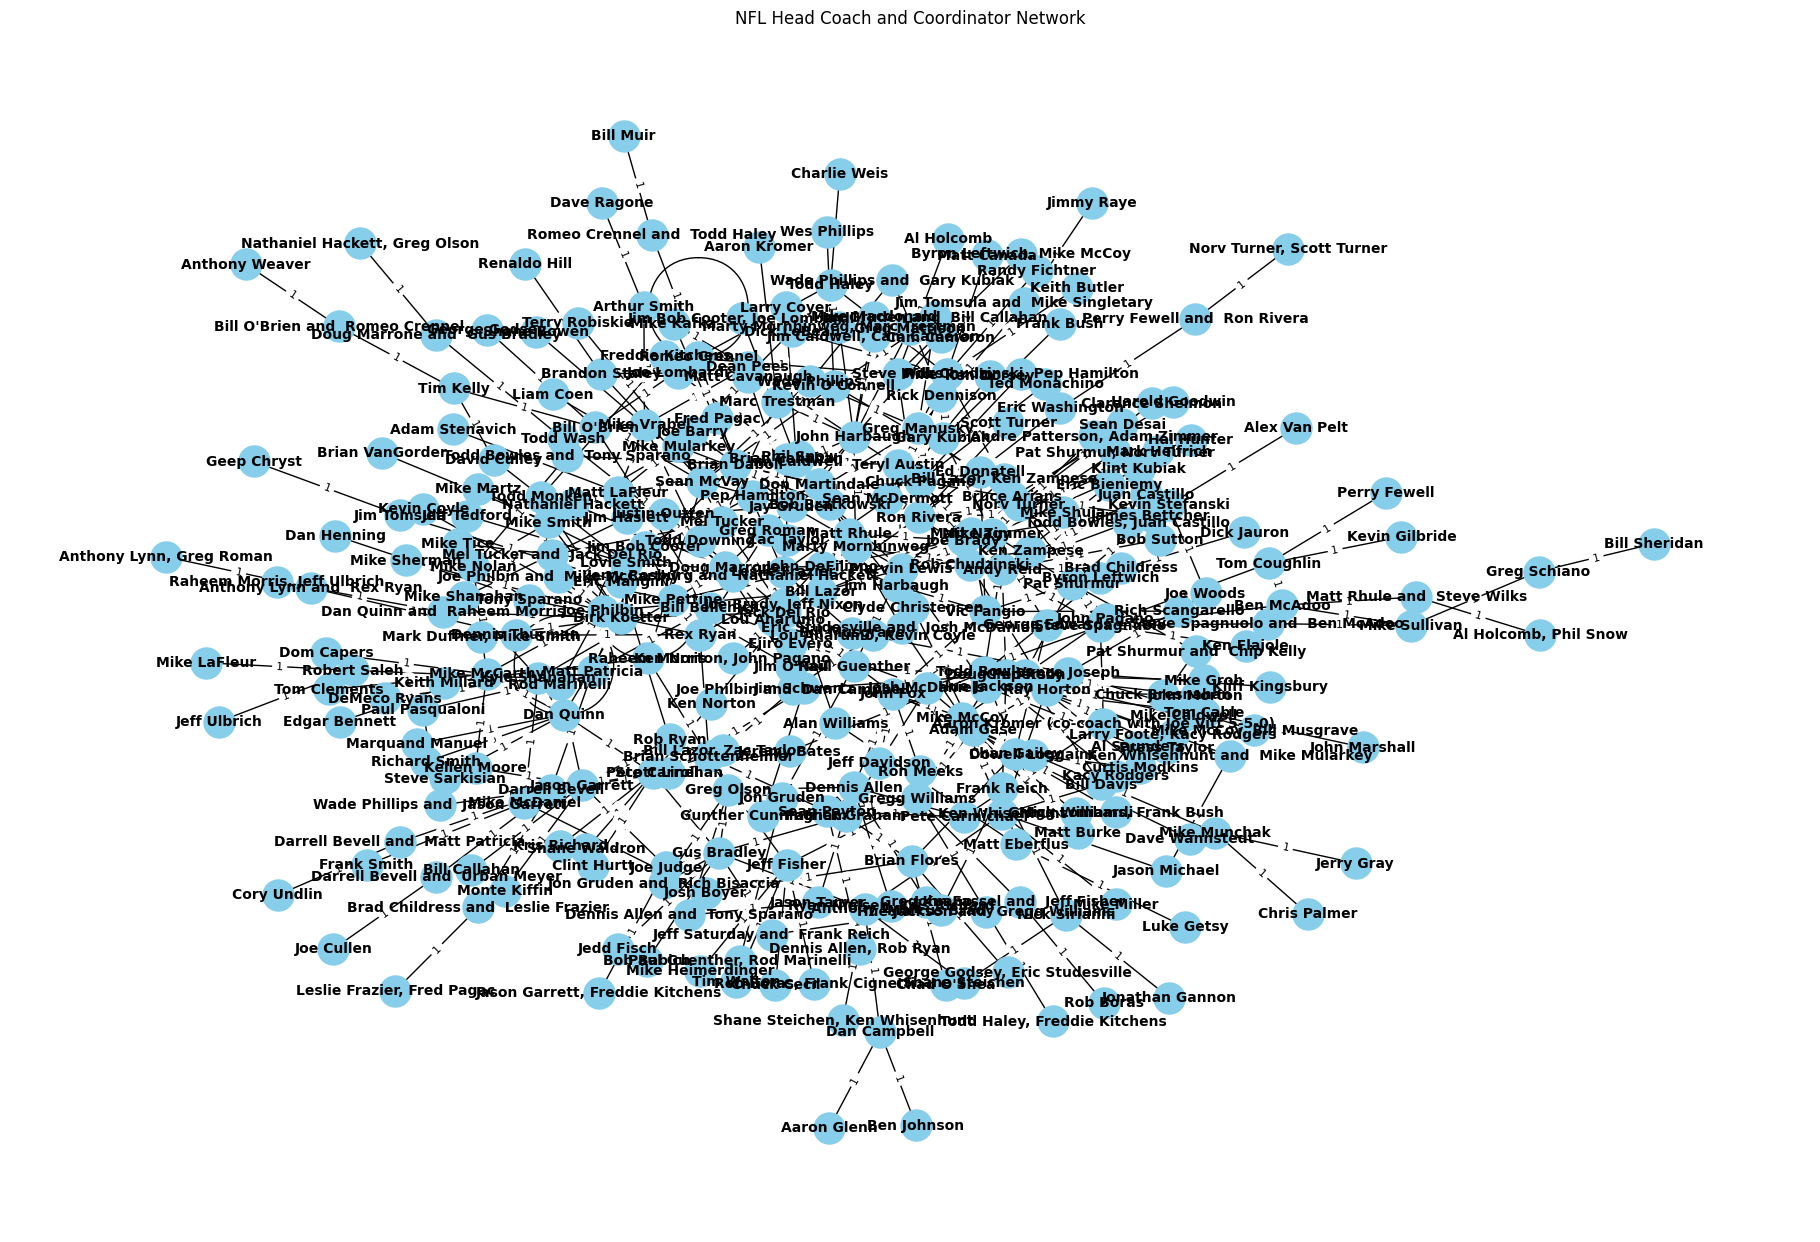

In [122]:
G = nx.Graph()

# Adding edges between Head Coach and Offensive/Defensive Coordinator
for idx, row in Test.iterrows():
    head_coach = row['Head Coach']
    off_coordinator = row['Offensive Coordinator']
    def_coordinator = row['Defensive Coordinator']

    # Add edges with weight 1 between Head Coach and Offensive/Defensive Coordinator
    if head_coach and off_coordinator:
        G.add_edge(head_coach, off_coordinator, weight=1)
    if head_coach and def_coordinator:
        G.add_edge(head_coach, def_coordinator, weight=1)


pos = nx.kamada_kawai_layout(G)

# Create the Graph
plt.figure(figsize=(18, 12))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=500, node_color='skyblue', font_color='black', font_weight='bold')

# Draw edge's labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("NFL Head Coach and Coordinator Network")
plt.show()

In [150]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)

Number of Nodes: 318
Number of Edges: 412


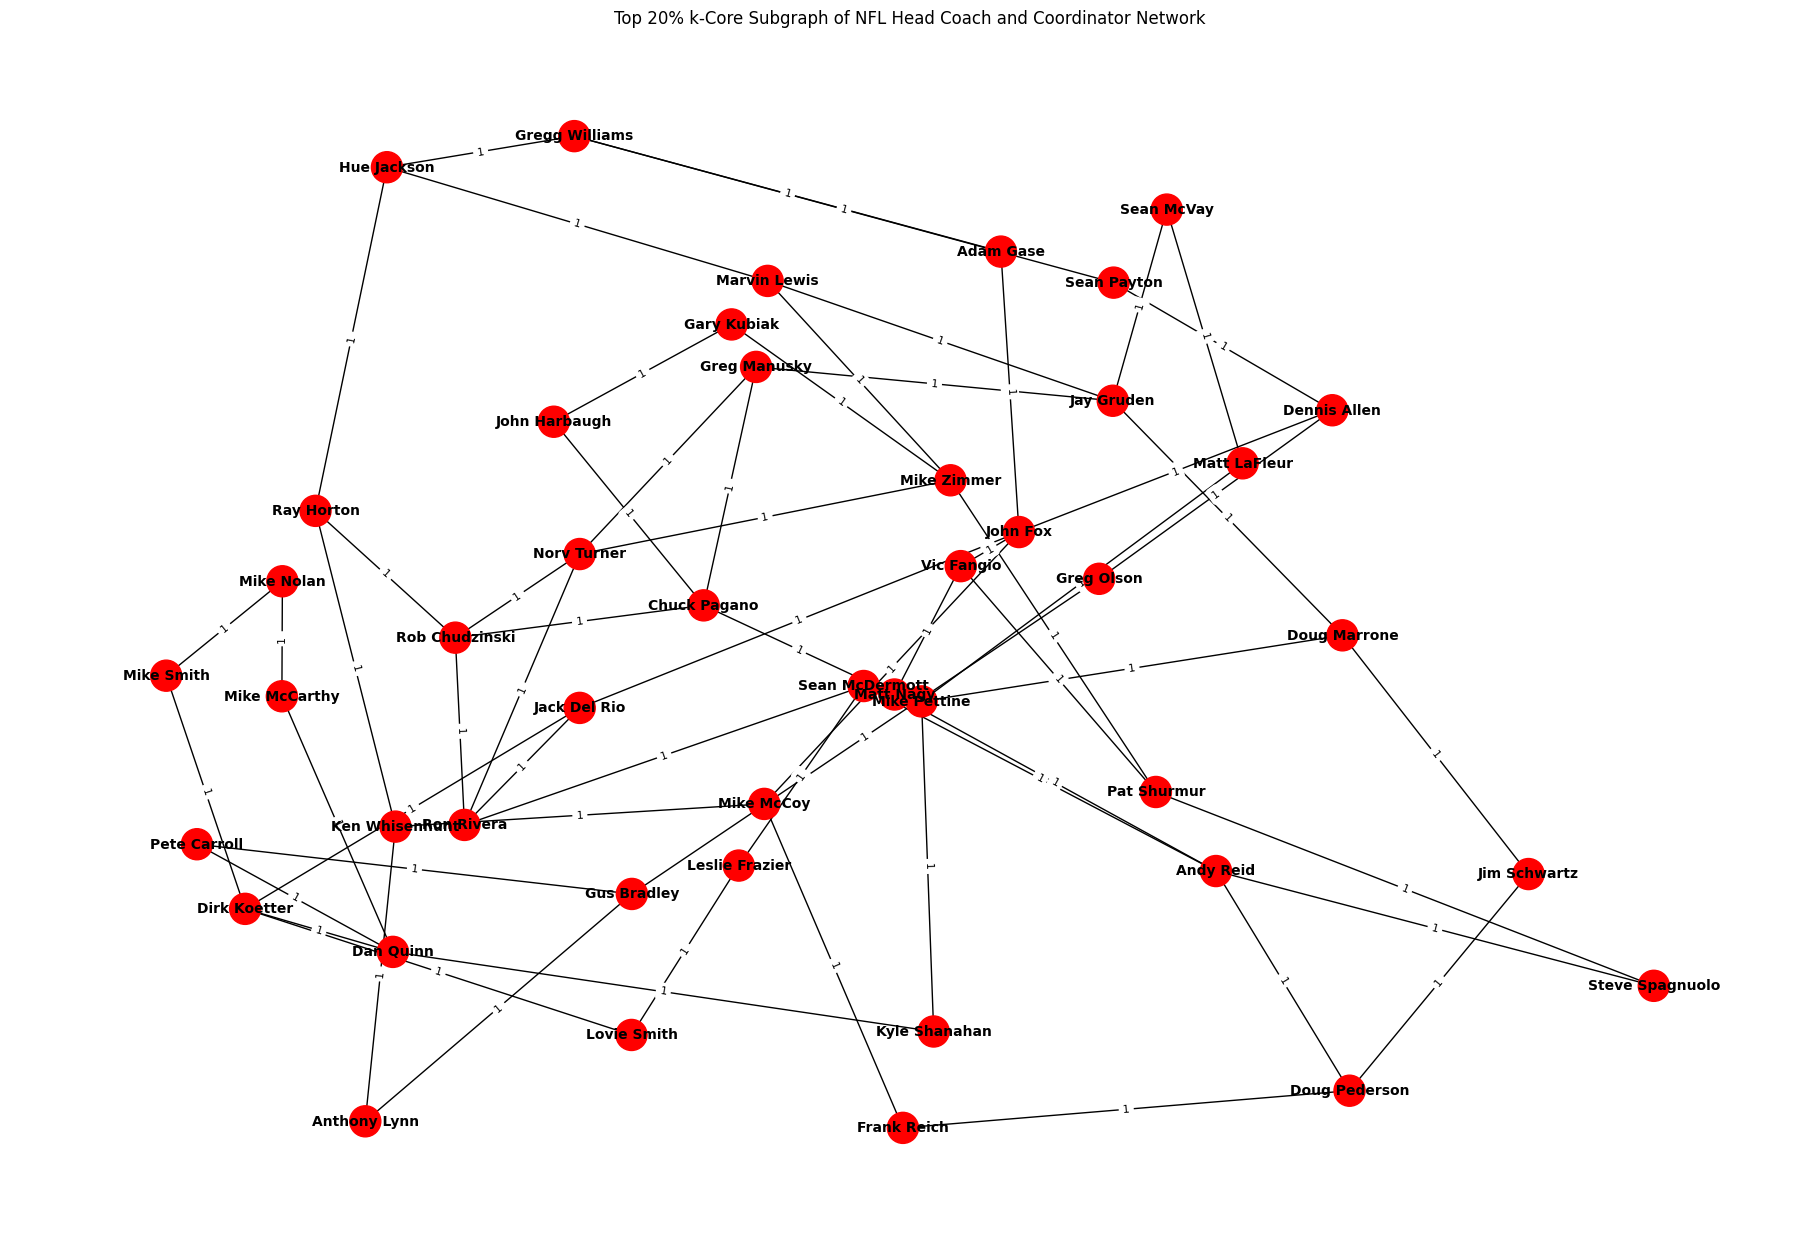

In [139]:
# Removing self-loops from the graph
G.remove_edges_from(nx.selfloop_edges(G))

# Calculate the degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort the nodes by degree centrality
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Take the top 20% of Nodes
top_percent = 0.20
num_top_nodes = int(len(sorted_nodes) * top_percent)
top_nodes = sorted_nodes[:num_top_nodes]

# Creating a k-core subgraph with the top 20% nodes
k_core_subgraph = nx.k_core(G.subgraph(top_nodes))
plt.figure(figsize=(18, 12))

node_colors = ['red' if node in top_nodes else 'skyblue' for node in k_core_subgraph.nodes]
nx.draw(k_core_subgraph, pos, with_labels=True, font_size=10, node_size=500, node_color=node_colors, font_color='black', font_weight='bold')

edge_labels = nx.get_edge_attributes(k_core_subgraph, 'weight')
nx.draw_networkx_edge_labels(k_core_subgraph, pos, edge_labels=edge_labels, font_size=8)

# Creating the graph
plt.title("Top 20% k-Core Subgraph of NFL Head Coach and Coordinator Network")
plt.show()

In [140]:
# Calculating Centrality Metrics
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_degree_centrality = sorted_degree[:5]
bottom_5_degree_centrality = sorted_degree[-5:]
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_betweenness_centrality = sorted_betweenness[:5]
bottom_5_betweenness_centrality = sorted_betweenness[-5:]
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_closeness_centrality = sorted_closeness[:5]
bottom_5_closeness_centrality = sorted_closeness[-5:]



def print_nodes_with_centrality(nodes_with_centrality):
    for node, centrality in nodes_with_centrality:
        print(f"{node}: {centrality:.4f}")

# Results
print("Top 5 nodes based on Degree Centrality:")
print_nodes_with_centrality(top_5_degree_centrality)

print("\nBottom 5 nodes based on Degree Centrality:")
print_nodes_with_centrality(bottom_5_degree_centrality)

print("\nTop 5 nodes based on Betweenness Centrality:")
print_nodes_with_centrality(top_5_betweenness_centrality)

print("\nBottom 5 nodes based on Betweenness Centrality:")
print_nodes_with_centrality(bottom_5_betweenness_centrality)

print("\nTop 5 nodes based on Closeness Centrality:")
print_nodes_with_centrality(top_5_closeness_centrality)

print("\nBottom 5 nodes based on Closeness Centrality:")
print_nodes_with_centrality(bottom_5_closeness_centrality)

Top 5 nodes based on Degree Centrality:
John Harbaugh: 0.0410
Mike Zimmer: 0.0315
Andy Reid: 0.0315
Marvin Lewis: 0.0284
Pat Shurmur: 0.0284

Bottom 5 nodes based on Degree Centrality:
Jerry Gray: 0.0032
Terry Robiskie: 0.0032
Shane Bowen: 0.0032
Matt Cavanaugh: 0.0032
Scott Turner: 0.0032

Top 5 nodes based on Betweenness Centrality:
Pete Carroll: 0.1042
Jack Del Rio: 0.0925
John Fox: 0.0925
Steve Spagnuolo: 0.0920
Andy Reid: 0.0905

Bottom 5 nodes based on Betweenness Centrality:
Jerry Gray: 0.0000
Terry Robiskie: 0.0000
Shane Bowen: 0.0000
Matt Cavanaugh: 0.0000
Scott Turner: 0.0000

Top 5 nodes based on Closeness Centrality:
Jack Del Rio: 0.2409
Chuck Pagano: 0.2374
John Fox: 0.2372
Mike Zimmer: 0.2368
Ron Rivera: 0.2357

Bottom 5 nodes based on Closeness Centrality:
Lou Anarumo: 0.0042
Justin Outten: 0.0042
Ejiro Evero: 0.0042
Bill Lazor Zac Taylor: 0.0042
Lou Anarumo Kevin Coyle: 0.0042


#### Further Analysis:




In [149]:
# Filter rows by Top Centrality Metrics
pete_carroll_rows = Test.loc[Test['Head Coach'].str.contains('Pete Carroll', case=False, na=False)]
John_Harbaugh_rows = Test.loc[Test['Head Coach'].str.contains('John Harbaugh', case=False, na=False)]
Andy_Reid_rows = Test.loc[Test['Head Coach'].str.contains('Andy Reid', case=False, na=False)]
Jack_Del_Rio_rows = Test.loc[Test['Head Coach'].str.contains('Jack Del Rio', case=False, na=False) | Test['Defensive Coordinator'].str.contains('Jack Del Rio', case=False, na=False)]
Jack_Del_Rio_rows_sorted = Jack_Del_Rio_rows.sort_values(by='Year', ascending=True)

# Print the records of these rows

print('Pete Carroll')
print(pete_carroll_rows[['Year', 'Team', 'Record','Points For', 'Points Against']])
print('       ')
print('John Harbaugh')
print(John_Harbaugh_rows[['Year', 'Team', 'Record','Points For', 'Points Against']])
print('       ')
print('Andy Reid')
print(Andy_Reid_rows[['Year', 'Team', 'Record','Points For', 'Points Against']])
print('       ')
print('Jack Del Rio')
print(Jack_Del_Rio_rows_sorted[['Year', 'Team', 'Record','Points For', 'Points Against']])

Pete Carroll
     Year              Team  Record Points For Points Against
364  2010  Seattle Seahawks   7-9-0        310            407
365  2011  Seattle Seahawks   7-9-0        321            315
366  2012  Seattle Seahawks  11-5-0        412            245
367  2013  Seattle Seahawks  13-3-0        417            231
368  2014  Seattle Seahawks  12-4-0        394            254
369  2015  Seattle Seahawks  10-6-0        423            277
370  2016  Seattle Seahawks  10-5-1        354            292
371  2017  Seattle Seahawks   9-7-0        366            332
372  2018  Seattle Seahawks  10-6-0        428            347
373  2019  Seattle Seahawks  11-5-0        405            398
374  2020  Seattle Seahawks  12-4-0        459            371
375  2021  Seattle Seahawks  7-10-0        395            366
376  2022  Seattle Seahawks   9-8-0        407            401
       
John Harbaugh
    Year              Team  Record Points For Points Against
26  2010  Baltimore Ravens  12-4-0  

## Results:

**Betweenness Centrality:**
Betweenness Centrality measures how often a node acts as a bridge as the shortest paths between pairs of nodes in the network. It will help quantify the extent how well a node is helping connect other pairs of nodes. Nodes with highest "betweenness centrality" are typically crucial for facilitating communication and information flow between different parts of the network. In our scenario they are the mutual coaching between 2 coaches and can later be the reason why someone gets the opportunity.

**Degree Centrality:**
Degree Centrality is a measure that counts the number of edges that are incident to a node. It measures how well-connected a node is within the social network. These nodes with high degree centrality typically are considered the most influential since they can directly interact with more nodes. This can help show which coaches have a highest success rate in their peers being developed and given opportunities.

**Closeness Centrality:**
Closeness Centrality quantifies how close a node is, on average, to all other nodes in the network. It will then calculate the average shortest path from a node to all other nodes. Nodes with high closeness centrality are more reachable in a social network. They typically disseminate information or influence more efficiently, on trend they have a shorter path to other nodes.

**Analysis:**

In summary, the top nodes based on Degree Centrality were John Harbaugh at 0.0410, Mike Zimmer at 0.0315, and Andy Reid at 0.0315. The bottome nodes were Jerry Gray at 0.0032, Terry Robiskie at 0.0032 and Shane Bowen at 0.0032. The top nodes based on Betweenness Centrality were Pete Carroll at 0.1042, Jack Del Rio at 0.0925, and John Fox at 0.0925. The bottom nodes were Jerry Gray at 0.0000, Terry Robiskie at 0.0000, and Shane Bowen at 0.0000. The top nodes based on Closeness Centrality were Jack Del Rio at 0.2409, Chuck Pagano at 0.2374, and John Fox at 0.2372. The bottom were Lou Anarumo at 0.0042, Justin Outten at 0.0042, and Ejiro Evero at 0.0042. However these centrality do make sense it doesn't show the entire picture as the year range is only the past 12 years as well as their are smaller positional coaches that were not included which would increase some other coaches centrality values.


### Future Improvements and Issues:


**1.   Social Network Graph Features**

> I would like to use the "Points For" and "Points Against" as well as their ranking in the league to add different weights to the social network edges. With that also create more edges with the notables coaches for every team as a brief example with this position coaches are more often not the ones to be promoted to Offensive/Defensive Coordinators for promotions. So a coach could have a hire degree of centrality but are excluded since they are techically just a position coach.

**2.   Additional Information for Coaching Weight**

> As noted previously and in my final project proposal, I wanted to add certain metrics to help determine if a coach was hired based on the new team's deficiency. As shown in this analysis there isn't anything along to that lines so what could be done is in another dataframe gather the Offensive Stats/player lines/logs for each season and pare them to a coach. This along with the players past/seasonal perfomance can help add weight to each of these coaches as well as how their team did.

**3. Further Analysis on Coaching Tenure**


> As seen only briefly in the data that I collected, the more centric nodes in the social network graph has been coaching about the entire period that I looked into. Commonly enough, these coaches all found success with their teams and eventually won a superbowl. As winning a superbowl as head coach allows your coaching resume to be exemplified to the point where you will be wanted. As known briefly there are 32 teams and only 1 team can win the superbowl so it is quite rare for majority of teams to have success.  


**4. Cleaning Up Code**


> Just briefly, there is a bunch of code written mainly in the web scrapping portion that I would like to clean up however, I am not able to at this time as well scared to mess up the code and it won't work. Overall, I don't think any code will be set in stone as there is always some sort of improvement that are done and changes to packages that will allow a different and maybe more efficient method that I haven't been able to see yet.


**5. Future Perfomance Prediction Model**


> Future Aspiration with the data I would say is combining the above improvements and solving the issues in order to have a better model. That being said it will be a goal of mine hopefully continued sooner than later to have a prediction model that will determine how a team might do statistically with additional coaching variable played in part. Offensive and Defensive play schemes play a huge part as well as what players are on each team and I think there can be a situation where a players perfomance can be estimated better. That being said I would use that model to help me dominate in fantasy football against my friends and I think it would be great practice with machine learning projection models as well as add a NLP, analysis based on social media and overall sentiment.





#### References:

*   https://www.pro-football-reference.com/
*   https://pro-football-history.com/coaches
*https://www.nfl.com/teams/